## Names
Philip Gehde, Moiyad Alfawwar.

## Part 1: Write the Introduction

For our Project 1, we choose the Statlog data set, which is a database for heart disease. This dataset has been cited in several research papers in the datascience field including: Diversity in Neural Network Ensembles (Gavin Brown. The University of Birmingham. 2004.), Overcoming the Myopia of Inductive Learning Algorithms with RELIEFF (Igor Kononenko and Edvard Simec and Marko Robnik-Sikonja), Unanimous Voting using Support Vector Machines (Elena Smirnova and Ida G. Sprinkhuizen-Kuyper and I. Nalbantis and b. ERIM and Universiteit Rotterdam, IKAT, Universiteit Maastricht), Dissertation Towards Understanding Stacking Studies of a General Ensemble Learning Scheme ausgefuhrt zum Zwecke der Erlangung des akademischen Grades eines Doktors der technischen Naturwissenschaften.

The dataset was uploaded by the University of California, Irvine, and is available at the UCI machine learning archive on their website for the Center for Machine Learning and Intelligent Systems at the following URL: https://archive.ics.uci.edu/ml/datasets/statlog+(heart)

The Statlog dataset has 270 instances, with no missing values and 13 different attributes. Due to the fact that there are no missing values, there is no need for a plot to summarize the proportion of missing data as this is non-applicable for all 13 attributes.

The 13 attributes (which have been extracted from a larger set of 75) include descriptive variables such as sex, and Chest pain type (4 values), however, these values were already label encoded. As such, we are left with the following attribute types: Real: 1,4,5,8,10,12 Ordered:11, Binary: 2,6,9 Nominal:7,3,13

Given that the categorical values were already label encoded, the choice (label-encoded vs one-hot-encoded) was made for us and we assume that the alphabetical ordering of label encoding will not prevent us from making medically relevant inferences from this data. In other words, we assume that the categorical value was ordered alphebetically as to represent the severity of the pain, for example, A-D. This assumption may give us trouble down the road, and should be further investigated.

If we were to work with categorical values for chest pain, one might suggest one-hot encoding as to prevent any issues that may arise if there is no obvious ordering, or ranking of our values, and rather solve this potential problem by represented each category as a binary vector. However, in order to avoid the pitfalls of multicollierity, it would be best to simply determine that categorical data is ranked appropriately and use label-encoding instead. Sex/Gender is binary, and so label-encoding can be considered appropriate.

This dataset is fascinating to work with because of the potential for machine learning and neural networks to be applied in medical diagnostic work. My father had some heart issues recently, that could have been avoided/treated appropriately if the data had been interpreted by a machine, and not a doctor who was later repeatedly sued succesfully for negligent practice. My girlfriend, who is a nurse, reports routinely on poor diagnostic work by colleagues (don't tell anybody). A large proportion of her work day is spent collecting and documenting data, and therein lies the real challenge. How do we gather the appropriate data for the correct diagnosis, to establish better preventative care, and better diagnostics in medicine with the help of machine learning? I believe this question to be a fundamental one in data mining. As good staticians, we have to evaluate the quality and potential biases of the data being used, determining what data is useful, how to gather it, and how to clean it.

Medical Diagnostic work is a highly complex analysis, because we are evaluating a system that is highly complex. It is difficult to establish causation in such systems but we are rather working in the realm of probabilities, where computers can shine. Our 13 attributes have been extracted from 75, which leads me to believe that we are working with a very clean data set. Given the complex nature of the human body I believe that none of them should be ommited. The attributes are listed below, and they all seem highly relevant to the diagnostic work ahead.

  -- 1. age       
  -- 2. sex       
  -- 3. chest pain type  (4 values)       
  -- 4. resting blood pressure  
  -- 5. serum cholestoral in mg/dl      
  -- 6. fasting blood sugar > 120 mg/dl       
  -- 7. resting electrocardiographic results  (values 0,1,2) 
  -- 8. maximum heart rate achieved  
  -- 9. exercise induced angina    
  -- 10. oldpeak = ST depression induced by exercise relative to rest   
  -- 11. the slope of the peak exercise ST segment     
  -- 12. number of major vessels (0-3) colored by flourosopy        
  -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     

As to which ones are most descriptive, I do not know. 

## Part 2: Write Python code for data analysis

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

hearts = np.loadtxt("./data/heart.csv", delimiter=",")

# hearts

In [2]:
# 2-D Numerical Data Set
twoDNum = np.array([[1, 2, 3, 4, 5, 6],
                    [7, 8, 9, 10, 11, 12],
                    [13, 14, 15, 16, 17, 18],
                    [19, 20, 21, 22, 23, 24],
                    [25, 26, 27, 28, 29, 30],
                    [31, 32, 33, 34, 35, 36],
                    [37, 38, 39, 40, 41, 42],
                    [43, 44, 45, 46, 47, 48],
                    [49, 50, 51, 52, 53, 54]])

In [3]:
twoDNum2 = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9],[10, 11, 12]])

In [4]:
# 2-D Categorical Data Set of Various Types
twoDCat = np.array([['Yes', 'Green', 'Shirt', 'A'],['No', 'Blue', 'Pants', 'B'],['Yes', 'Red', 'Blouse', 'C'],['No', 'Yellow', 'Shirt', 'D']])


In [5]:
# 1-D Vectors
vector1 = np.array([1, 2, 3, 4, 5])
vector2 = np.array([1, 2, 3, 4, 5])


#### 2a) (5 points) A function that will compute the mean of a numerical, multidimensional data set input as a 2-dimensional numpy array

In [6]:
# Function for the multivariate mean of a numerical data set
def twoDimMean(inputArr):
    total = np.zeros([len(inputArr[0])])
    num_elements = len(inputArr)

    for i in range(len(inputArr)):
        for j in range(len(inputArr[0])):
            xi = inputArr[:, j]
            total[j] = total[j] + xi[i]

    mean = total/num_elements
    return mean


In [7]:
print("\n2-Dimensional Multivariate Mean:", twoDimMean(twoDNum))
# test : fixed. now correct
# print("mean: ", np.mean(twoDNum, 0))


2-Dimensional Multivariate Mean: [25. 26. 27. 28. 29. 30.]


#### 2b) (5 points) A function that will compute the estimated covariance between two attributes that are input as one-dimensional numpy vectors

In [8]:
# Function for sample covariance between two attributes
def covariance(a, b):
    x, y, total = 0, 0, 0
    n = len(a)
    # attr. Sum 
    for i in range(n):
        x = x + a[i]
        y = y + b[i]
    # attr. Mean
    xMean = x / n
    yMean = y / n

    # Covariance sum
    for i in range(n):
        total = total + ((a[i]) - xMean) * ((b[i]) - yMean)
    covariance = (1 / (n - 1)) * total
    return covariance


In [9]:
print("\nCovariance: ", covariance(vector1, vector2))
# test : correct.
# print("cov: ", np.cov(vector1, vector2)[0][0])


Covariance:  2.5


#### 2c) (5 points) A function that will compute the correlation between two attributes that are input as two numpy vectors.

In [10]:
# Function for correlation between two attributes
def correlation(p1, p2):
    x, y, axb, a2, b2 = 0, 0, 0, 0, 0
    n = len(p1)

    for i in range(n):
        x = x + p1[i]
        y = y + p2[i]

    x_mean = x / n
    y_mean = y / n

    for i in range(n):
        a = (p1[i] - x_mean)
        b = (p2[i] - y_mean)
        axb = axb + (a * b)
        a2 = a2 + (a * a)
        b2 = b2 + (b * b)
    
    correlation = axb / (math.sqrt(a2 * b2))
    
    return correlation


In [11]:
print("\nCorrelation: %f" % correlation(vector1, vector2))

# test : correct.
# print("corr %f" % np.corrcoef(vector1,vector2)[0][0])


Correlation: 1.000000


#### 2d) A function that will normalize the attributes in a two-dimensional numpy array using range normalization.

In [12]:

# Function for min by column
# ref: https://www.geeksforgeeks.org/program-find-minimum-maximum-element-array/
def getMin(inputArr):
    value = inputArr[0]
    n = len(inputArr)
    for i in range(1, n):
        value = min(value, inputArr[i])
    return value


# Function for max by column
# ref: https://www.geeksforgeeks.org/program-find-minimum-maximum-element-array/
def getMax(inputArr):
    value = inputArr[0]
    n = len(inputArr)
    for i in range(1, n):
        value = max(value, inputArr[i])
    return value

def rangeNormal(inputArr):
    rowLen = len(inputArr)
    colLen = len(inputArr[0])
    rngNormal = np.empty([rowLen, colLen])
    
    for row in range(rowLen):
        for col in range(colLen):
            max_min = getMax(inputArr[:, col]) - getMin(inputArr[:, col])
            x_sub_min = (inputArr[row][col] - getMin(inputArr[:, col]))
            rngNormal[row][col] = x_sub_min / max_min
    return rngNormal


In [13]:
print("\nRange Normalized Data:\n", rangeNormal(twoDNum))
print("range normalized 2: ", rangeNormal(twoDNum2))


Range Normalized Data:
 [[0.    0.    0.    0.    0.    0.   ]
 [0.125 0.125 0.125 0.125 0.125 0.125]
 [0.25  0.25  0.25  0.25  0.25  0.25 ]
 [0.375 0.375 0.375 0.375 0.375 0.375]
 [0.5   0.5   0.5   0.5   0.5   0.5  ]
 [0.625 0.625 0.625 0.625 0.625 0.625]
 [0.75  0.75  0.75  0.75  0.75  0.75 ]
 [0.875 0.875 0.875 0.875 0.875 0.875]
 [1.    1.    1.    1.    1.    1.   ]]
range normalized 2:  [[0.    0.    0.   ]
 [0.333 0.333 0.333]
 [0.667 0.667 0.667]
 [1.    1.    1.   ]]


#### 2e) (5 points) A function that will normalize the attributes in a two-dimensional numpy array using standard normalization

In [14]:
# Helper function 
def oneDimMean(inputArr):
    total = 0
    numElements = 0

    for i in range(len(inputArr)):
        total = total + inputArr[i]
        numElements = numElements + 1
    mean = total / numElements
    return mean


# Helper function for SD
def stdDevHelper(inputArr):
    total = 0
    numElements = 0
    mean = oneDimMean(inputArr)

    for i in range(len(inputArr)):
        total = total + (inputArr[i] - mean) ** 2
        numElements = numElements + 1

    std_dev = math.sqrt(total / (numElements - 1))
    return std_dev


def listUnique(inputArr):
    unique = []
    for x in inputArr:
        if x not in unique:
            unique.append(x)
    return unique


def stdNormal(inputArr):
    rowLen = len(inputArr)
    colLen = len(inputArr[0])

    stdNormal = np.empty([rowLen, colLen])
    for i in range(rowLen):
        for j in range(colLen):
            xi = inputArr[i][j]
            colMean = oneDimMean(inputArr[:, j])
            stdDev = stdDevHelper(inputArr[:, j])
            stdNormal[i][j] = (xi - colMean) / stdDev
    return stdNormal

In [15]:
# print("\nStandard Normalized Data:\n", stdNormal(twoDNum))

# test: correct!
# np.set_printoptions(precision=3)
# print(stdNormal(oneHotMatrix))

rangeNormal(np.array([[1, 2, 3, 4], [3, 5, 8, 3]]))

array([[0., 0., 0., 1.],
       [1., 1., 1., 0.]])

#### 2f) (5 points) A function that will compute the covariance matrix of a data set.

In [16]:
def covarMatrix(inputArr):
    # dim = np.array = inputArr.shape
    rowLen = inputArr.shape[1]
    
    covarMatrix = np.empty([rowLen, rowLen])
    for i in range(rowLen):
        for j in range(rowLen):
            xi = inputArr[:, i]
            xj = inputArr[:, j]
            covarMatrix[i,j] = covariance(xi, xj)
    return covarMatrix

# def totalVariance(inputArr):
#     nrow = len(inputArr[0])


In [17]:
# print("\nCovariance Matrix:\n", covarMatrix(twoDNum))
covarHearts = covarMatrix(hearts)
# totalVar = 0
# for i in range(hearts.shape[1]):
#     totalVar += covariance(hearts[:,i], hearts[:,i])

# totalVar

#### 2g) (5 points) A function that will label-encode a two-dimensional categorical data array that is passed in as input.

In [18]:
def labelEncode(inputArr):
    rowLen = len(inputArr)
    colLen = len(inputArr[0])

    lblEncoded = np.empty([rowLen, colLen])
    for i in range(rowLen):
        for j in range(colLen):
            xi = inputArr[:, j]
            xu = listUnique(xi)
            lblEncoded[i][j] = xu.index(xi[i]) + 1

    return lblEncoded


In [19]:
print("\nLabel Encoded Matrix:\n", labelEncode(twoDCat))


Label Encoded Matrix:
 [[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [1. 3. 3. 3.]
 [2. 4. 1. 4.]]


## Part 3

### • (5 points) Convert all categorical attributes using label encoding or one-hot-encoding
Several attributes in our data set contained categorical data that had already been label encoded. 


### (2 points) If your data has missing values, fill in those values with the attribute mean.
Our dataset has no missing values. Usually we would have the choice of replacing missing data with either 0's or NA 
using pandas library, but today's our lucky day. 

### (2 points) What is the multi-dimensional mean of the numerical data matrix (where categorical data have been converted to numerical values)?

In [20]:
print(twoDimMean(hearts))
# hearts.mean(0)
# need to remove non numerical values.

[5.443e+01 6.778e-01 3.174e+00 1.313e+02 2.497e+02 1.481e-01 1.022e+00
 1.497e+02 3.296e-01 1.050e+00 1.585e+00 6.704e-01 4.696e+00 1.444e+00]


### (4 points) What is the covariance matrix of the numerical data matrix (where categorical data have been converted to numerical values)?

In [21]:
print(covarMatrix(hearts))
# need to remove non numerical values.

[[ 8.298e+01 -4.026e-01  8.388e-01  4.443e+01  1.036e+02  4.002e-01
   1.165e+00 -8.487e+01  4.217e-01  2.026e+00  8.942e-01  3.062e+00
   1.876e+00  9.628e-01]
 [-4.026e-01  2.192e-01  1.541e-02 -5.243e-01 -4.880e+00  7.022e-03
   1.834e-02 -8.254e-01  3.969e-02  5.223e-02  1.454e-02  3.837e-02
   3.553e-01  6.939e-02]
 [ 8.388e-01  1.541e-02  9.027e-01 -7.330e-01  4.442e+00 -3.332e-02
   7.047e-02 -6.992e+00  1.580e-01  1.820e-01  7.991e-02  2.026e-01
   4.843e-01  1.974e-01]
 [ 4.443e+01 -5.243e-01 -7.330e-01  3.190e+02  1.597e+02  9.897e-01
   2.070e+00 -1.619e+01  6.964e-01  4.557e+00  1.563e+00  1.445e+00
   4.577e+00  1.382e+00]
 [ 1.036e+02 -4.880e+00  4.442e+00  1.597e+02  2.671e+03  4.633e-01
   8.647e+00 -2.244e+01  1.905e+00  1.640e+00 -1.828e-01  6.174e+00
   2.892e+00  3.037e+00]
 [ 4.002e-01  7.022e-03 -3.332e-02  9.897e-01  4.633e-01  1.267e-01
   1.900e-02  1.855e-01 -6.884e-04 -1.041e-02  9.638e-03  4.158e-02
   3.401e-02 -2.891e-03]
 [ 1.165e+00  1.834e-02  7.047e-02

### (5 points) Choose 5 pairs of attributes that you think could be related. Create scatter plots of all 5 pairs and include these in your report, along with a description and analysis that summarizes why these pairs of attributes might be related, and how the scatter plots do or do not support this intuition.

Correlation : 0.220


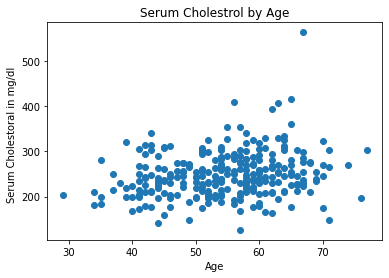

In [22]:
# 5 scatter plots and quick analysis

#plot 1

plt.scatter(hearts[:,0], hearts[:,4])
plt.title("Serum Cholestrol by Age")
plt.xlabel("Age")
plt.ylabel("Serum Cholestoral in mg/dl  ")

print("Correlation : %.3f" % correlation(hearts[:,0], hearts[:,4]))

We expected there to be a strong positive correlation between age and cholersterol. While our scaterplot does indicate a positive correlation, our slope is less steep than expected. Our Correlation of 0.220 indicates a mild, positive relationship. We conclude that there is a gradual, albeit slight increase in serum cholesterol in mg/dl with age. 

Correlation : -0.402


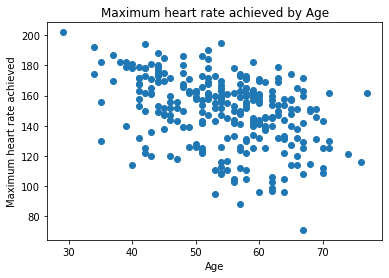

In [23]:
#plot 2

plt.scatter(hearts[:,0], hearts[:,7])
plt.title("Maximum heart rate achieved by Age")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate achieved")

print("Correlation : %.3f" % correlation(hearts[:,0], hearts[:,7]))

We expected there to be a correlation between Maximum heart rate achieved and Age. However, we were not expecting as steep of a slope, showing a fairly significant negative correlation between the MHRA and age with a value of -0.402. This might be expected if we assume that our organs become less performant as we age.

Correlation : 0.194


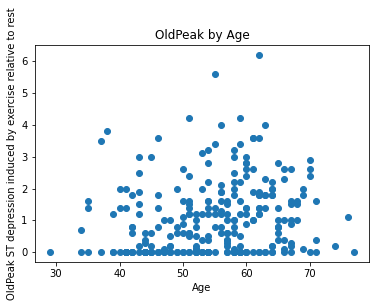

In [24]:
#plot 3

plt.scatter(hearts[:,0], hearts[:,9])
plt.title("OldPeak by Age")
plt.xlabel("Age")
plt.ylabel("OldPeak ST depression induced by exercise relative to rest")

print("Correlation : %.3f" % correlation(hearts[:,0], hearts[:,9]))

We were unable to determine a significant correlation for OldPeak by Age. While our Correlation of 0.194 indicates some correlation, our scatterplot indicates a well distributed range of values for all age groups. This observations support our expectations as this OldPeak may depend on a variety of more significant factors besides age. 

Correlation : -0.019


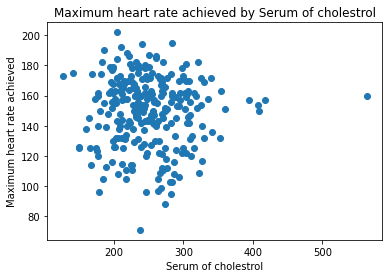

In [25]:
#plot 4

plt.scatter(hearts[:,4], hearts[:,7])
plt.title("Maximum heart rate achieved by Serum of cholestrol")
plt.xlabel("Serum of cholestrol")
plt.ylabel("Maximum heart rate achieved")

print("Correlation : %.3f" % correlation(hearts[:,4], hearts[:,7]))

Here we expected to see a cluster concerning a fairly low range of Serum of Cholesterol, but not necessarily a correlation between these Maximum heart rate achieved and Serum of cholesterol. This is supported by our scatterplot as well as our Correlation of -0.019, indicating an insignificant, almost non-existant relationship between the two variables. 

Correlation : -0.349


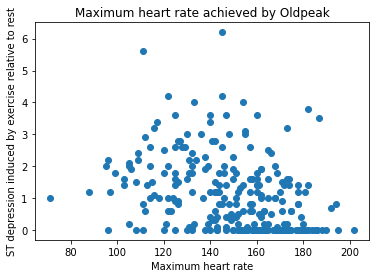

In [26]:
#plot 5

plt.scatter(hearts[:,7], hearts[:,9])
plt.title("Maximum heart rate achieved by Oldpeak")
plt.xlabel("Maximum heart rate")
plt.ylabel("ST depression induced by exercise relative to rest")

print("Correlation : %.3f" % correlation(hearts[:,7], hearts[:,9]))

As expected, there is a negative correlation between ST depression induced by excercise relative to rest and Maximum heart rate. We expected there to be a negative correlation between Maximum hear rate and age, so it is only natural that ST depression induced by excercise relative to rest is affected by this as well. We generally consider a decrease in fitness level as people age. Our Correlation of -0.349 indicates a negative correlation. 

### (3 points) Which range-normalized numerical attributes have the greatest estimated covariance? What is their estimated covariance? Create a scatter plot of these range-normalized attributes.

Covariance : 0.2489467162329621 Columns:  6 ,  6


Text(0, 0.5, 'Resting electrocadriographic results')

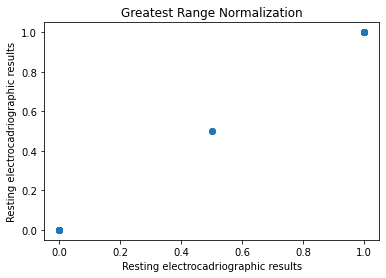

In [27]:

# remove non-nurmerical attributes
rangedNormalized = rangeNormal(hearts)
# print(rangedNormalized)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
# print(covarMatrix(rangedNormalized))
covar = 0
cov_i = 0
cov_j = 0
for i in range(rangedNormalized.shape[1]):
    for j in range(rangedNormalized.shape[1]):
        if(covariance(rangedNormalized[:,i],rangedNormalized[:,j]) > covar):
            covar = covariance(rangedNormalized[:,i],rangedNormalized[:,j])
            cov_i = i
            cov_j = j

print("Covariance :", covar , "Columns: ",  cov_i,", ", cov_j)

plt.scatter(rangedNormalized[:,6], rangedNormalized[:,6])
plt.title("Greatest Range Normalization")
plt.xlabel("Resting electrocadriographic results")
plt.ylabel("Resting electrocadriographic results")


### (3 points) Which Z-score-normalized numerical attributes have the greatest correlation? What is their correlation? Create a scatter plot of these Z-score-normalized attributes.

Covariance : 1.0 Columns:  0 ,  0


Text(0, 0.5, 'Number of major vessels')

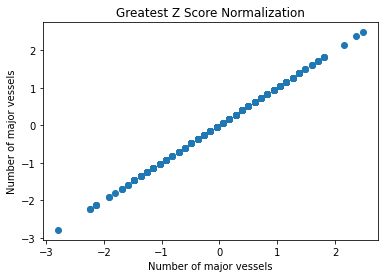

In [46]:
zScoreData = stdNormal(hearts)

covar = 0
corr = 0
cov_i = 0
cov_j = 0
for i in range(zScoreData.shape[1]):
    for j in range(zScoreData.shape[1]):
        if(correlation(zScoreData[:,i],zScoreData[:,j]) > corr):
            corr = correlation(zScoreData[:,i],zScoreData[:,j])
            cov_i = i
            cov_j = j

print("Covariance :", corr , "Columns: ",  cov_i,", ", cov_j)

plt.scatter(zScoreData[:,0], zScoreData[:,0])
plt.title("Greatest Z Score Normalization")
plt.xlabel("Number of major vessels")
plt.ylabel("Number of major vessels")

### (3 points) Which Z-score-normalized numerical attributes have the smallest correlation? What is their correlation? Create a scatter plot of these Z-score-normalized attributes.

Covariance : -0.41851396532659346 Columns:  7 ,  13


Text(0.5, 0, 'Absence or presence of heart disease')

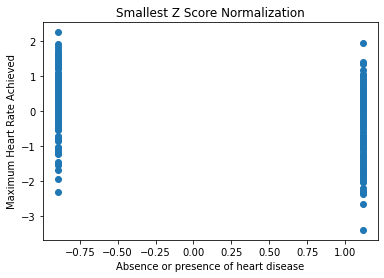

In [40]:
zScoreData = stdNormal(hearts)

covar = 0
corr = 0
cov_i = 0
cov_j = 0
for i in range(zScoreData.shape[1]):
    for j in range(zScoreData.shape[1]):
        if(correlation(zScoreData[:,i],zScoreData[:,j]) < corr):
            corr = correlation(zScoreData[:,i],zScoreData[:,j])
            cov_i = i
            cov_j = j

print("Covariance :", corr , "Columns: ",  cov_i,", ", cov_j)



plt.scatter(zScoreData[:,13], zScoreData[:,7])
plt.title("Smallest Z Score Normalization")
plt.ylabel("Maximum Heart Rate Achieved")
plt.xlabel("Absence or presence of heart disease")

### (3 points) How many pairs of features have correlation greater than or equal to 0.5?

In [30]:
correlationList = []
totalRVar = 0
for i in range(hearts.shape[1]):
    for j in range(hearts.shape[1]):
        correlationList.append(correlation(hearts[:,i], hearts[:,j]))
correlationList.sort()
corrSet = set(correlationList)

count = 0
for i in corrSet:
    if(i >= 0.5):
        count += 1
print("Number of correlation pairs larger than 0.5: ", count)

Number of correlation pairs larger than 0.5:  3


### (3 points) How many pairs of features have negative estimated covariance?

In [31]:
totalVar = []
totalRVar = 0
for i in range(hearts.shape[1]):
    for j in range(hearts.shape[1]):
        totalVar.append(covariance(hearts[:,i], hearts[:,j]))
totalVar.sort()
varSet = set(totalVar)
count = 0
for i in varSet:
    if(i < 0):
        count += 1


print("Number of pairs that have negative estimated covariance: ",count)

Number of pairs that have negative estimated covariance:  21


### (2 points) What is the total variance of the data?

In [32]:
totalVar = 0
for i in range(hearts.shape[1]):
    totalVar += covariance(hearts[:,i], hearts[:,i])
print("Total variance: %.3f" % totalVar)


# totalVarList = []
# totalRVar = 0
# for i in range(hearts.shape[1]):
#     for j in range(hearts.shape[1]):
#         totalVarList.append(covariance(hearts[:,i], hearts[:,j]))
# # totalVarList.sort()
# for i in totalVarList:
#     totalRVar += i

# totalRVar

Total variance: 3619.190


### (2 points) What is the total variance of the data, restricted to the five features that have the greatest estimated variance?

In [33]:
totalRestrictedVar = []
totalRVar = 0
for i in range(hearts.shape[1]):
    for j in range(hearts.shape[1]):
        totalRestrictedVar.append(covariance(hearts[:,i], hearts[:,j]))
totalRestrictedVar.sort()
totalVarRSet = set(totalRestrictedVar)
for i in totalRestrictedVar[-5:]:
    totalRVar += i

# for j in totalVarRSet:
#     totalRVar += j


print("Total variance restricted to the greatest five features estimated: %.3f" % totalRVar)

Total variance restricted to the greatest five features estimated: 3846.617
